## Illustration of Multiple Linear Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/iksinc/ML-Stuff/blob/main/Insurancemodeling.ipynb)

### We will work insurance data. The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). 

- The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region)that were converted into factors with numerical value desginated for each level.

- The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
pd.set_option("display.precision", 3)

In [24]:
file = 'https://github.com/iksinc/Data/raw/main/insurance.csv'# Select the file
df = pd.read_csv(file)#index_col=0 tells pandas that col 0 is index col & not data
print(df[0:2])

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55


In [3]:
df.describe()

,age,bmi,children,expenses
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.665,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,16.000,0.000,1121.870
25%,27.000,26.300,0.000,4740.288
50%,39.000,30.400,1.000,9382.030
75%,51.000,34.700,2.000,16639.915
max,64.000,53.100,5.000,63770.430


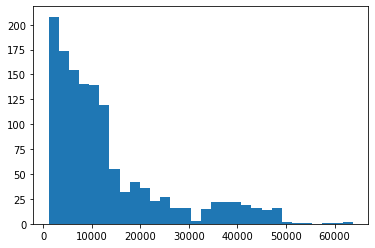

In [4]:
# The target variable is the expenses. We will do a histogram of expenses to see the distribution of the values
plt.hist(df['expenses'], bins=30)
plt.show()# plt.show suppresses the bins array from being outputted.

In [5]:
df.groupby('sex')['sex'].count()

sex
female    662
male      676
Name: sex, dtype: int64

In [6]:
df.groupby(['smoker','sex'])['sex'].count()

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: sex, dtype: int64

In [7]:
# Let's look at correlation among the variables
corr = df[['age', 'bmi', 'children', 'expenses']].corr()

In [8]:
print(corr)

            age    bmi  children  expenses
age       1.000  0.109     0.042     0.299
bmi       0.109  1.000     0.013     0.199
children  0.042  0.013     1.000     0.068
expenses  0.299  0.199     0.068     1.000


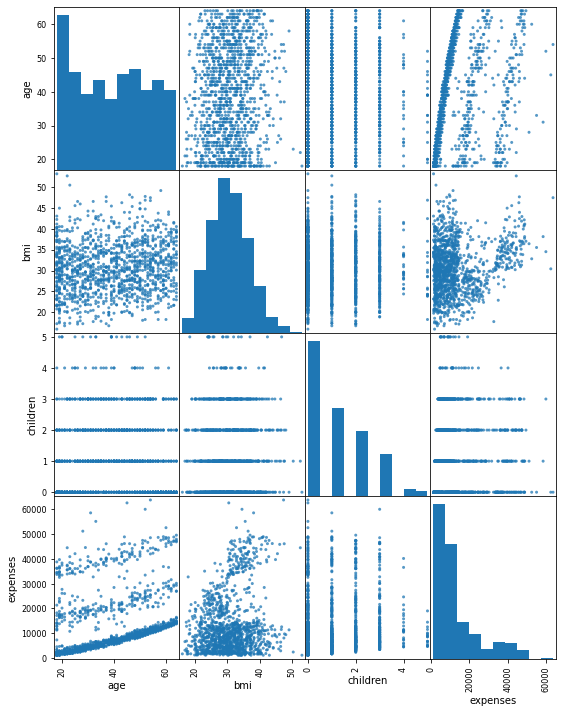

In [9]:
# Pairwise plotting also helps
from pandas.plotting import scatter_matrix # plotting several scatter plots
scatter_matrix(df, alpha = 0.75, figsize = (9, 12), diagonal = 'hist')
plt.show()

In [10]:
###### Model building
## First convert categorical variables
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])
df[0:2]

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55


In [11]:
data = np.array(df)
X = data[:,0:6]#Separate predictors
Y = data[:,6]# Separate response

In [12]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, Y)
Y_pred = regr.predict(X)

In [13]:
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
mse = np.mean((Y-Y_pred)**2)
print('mse: \n',mse)

Coefficients: 
 [   257.27248218   -131.14574742    332.6448185     479.56455958
 -23819.32186917    353.48536976]
Intercept: 
 10940.842344022265
mse: 
 36525536.8689183


In [14]:
print('regr.Score: \n',regr.score(X,Y))# Score closed to 1 is a perfect fit; close to 0 means no linear relationship

regr.Score: 
 0.7507516902763371


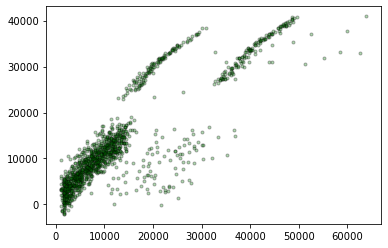

In [16]:
plt.scatter(Y, Y_pred,c = 'g',marker = ".",edgecolor='k', alpha = 0.30)
plt.show()

In [17]:
# Can we get a better fit? We can try to create one or more new variables (known as interaction variables) based upon
#domain knowledge.Let us define bmi30s which represents
# smokers with high bmi values
bmi30 = X[:,2]-30

In [18]:
bmis = bmi30*X[:,4]

In [19]:
bmis= bmis.reshape(1338,1)
bmis.shape

(1338, 1)

In [20]:
X = np.hstack((X, bmis))

In [21]:
regr.fit(X, Y)
Y_pred = regr.predict(X)

In [22]:
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
mse = np.mean((Y-Y_pred)**2)
print('mse: \n',mse)

Coefficients: 
 [   263.9867415    -498.56633559   1460.82626337    518.78694014
 -22848.34173728    429.12066572  -1442.95285964]
Intercept: 
 -23910.82138971916
mse: 
 23327954.22034974


In [23]:
print('regr.Score: \n',regr.score(X,Y))# Score closed to 1 is a perfect fit; close to 0 means no linear relationship

regr.Score: 
 0.840811288288523


In [ ]:
# The regr.score has improved indicating a better model. The creation of new features as done above
# is called feature engineering.